## Plotting the VHG of different equipment

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import pandas as pd
import os

working_directory = "C:/Users/huck4481/Documents/GitHub/La_Jara/GW-Piezo-HypFlux-Plots/VHG_plots/"
os.chdir(working_directory)
results_directory = "./plots/"

Calculating VHG - GW

In [2]:
# filenames and directories
filename1 = "./GW_WSE/piezometer_WSE_2023_corrected.csv"
filename2 = "./GW_WSE/SM23_GWSE_corrected.csv"
filename3 = "./GW_WSE/SP23_GWSE_corrected.csv"

# reading files
piezometers = pd.read_csv(filename1, low_memory=False)
summer_GW = pd.read_csv(filename2, low_memory=False)
spring_GW = pd.read_csv(filename3, low_memory=False)
summer_GW.head()

,Date_Time,GW1,GW2,GW3,GW4,GW5,GW6,GW7,GW8,GW9
0,6/22/2023 0:00,2721.523772,2721.737494,2722.130077,2723.666612,2732.471654,2734.129785,2734.066729,2735.80124,2735.962491
1,6/22/2023 0:15,2721.522022,2721.735744,2722.126577,2723.666612,2732.471654,2734.126286,2734.068479,2735.80007,2735.962491
2,6/22/2023 0:30,2721.522022,2721.738074,2722.128907,2723.666612,2732.473404,2734.129785,2734.070229,2735.80357,2735.964241
3,6/22/2023 0:45,2721.523192,2721.736324,2722.131247,2723.667202,2732.473414,2734.129786,2734.068479,2735.80124,2735.964241
4,6/22/2023 1:00,2721.523192,2721.736324,2722.128327,2723.666032,2732.471664,2734.129206,2734.068479,2735.80124,2735.964241


In [3]:
# convert to datetime format and set as index
piezometers["Date_Time"] = pd.to_datetime(piezometers["Date_Time"])
summer_GW["Date_Time"] = pd.to_datetime(summer_GW["Date_Time"])
spring_GW["Date_Time"] = pd.to_datetime(spring_GW["Date_Time"])
piezometers.set_index("Date_Time", inplace=True)
summer_GW.set_index("Date_Time", inplace=True)
spring_GW.set_index("Date_Time", inplace=True)

# calculation for the summer
tempCalc1 = piezometers[["P2B", "P5B"]].dropna()
tempCalc2 = summer_GW[["GW3", "GW8"]].dropna()
# merge the dataframes by date (index)
VHG_GW_summer = tempCalc1.merge(tempCalc2, how="outer", left_index=True, right_index=True)
VHG_GW_summer = VHG_GW_summer.dropna()
VHG_GW_summer["VHG_GW_downstream"] = VHG_GW_summer["GW3"] - VHG_GW_summer["P2B"]
VHG_GW_summer["VHG_GW_upstream"] = VHG_GW_summer["GW8"] - VHG_GW_summer["P5B"]

# calculation for the spring
tempCalc1 = piezometers[["P2B", "P5B"]].dropna()
tempCalc2 = spring_GW[["GW3", "GW8"]].dropna()
# merge the dataframes by date (index)
VHG_GW_spring = tempCalc1.merge(tempCalc2, how="outer", left_index=True, right_index=True)
VHG_GW_spring = VHG_GW_spring.dropna()
VHG_GW_spring["VHG_GW_downstream"] = VHG_GW_spring["GW3"] - VHG_GW_spring["P2B"]
VHG_GW_spring["VHG_GW_upstream"] = VHG_GW_spring["GW8"] - VHG_GW_spring["P5B"]
# determine dates
VHG_GW_spring = VHG_GW_spring.loc["2023-04-01":"2023-06-20"]
VHG_GW_summer = VHG_GW_summer.loc["2023-06-22":"2023-09-30"]


Getting VHG from piezometer nest

In [4]:
# filenames and directories
filename1 = "./Piezo_VHG/VHG_B-A_2023.csv"
filename2 = "./Piezo_VHG/VHG_C-B_2023.csv"

# reading files
bottom_piezo = pd.read_csv(filename1)
top_piezo = pd.read_csv(filename2)
bottom_piezo.head()
top_piezo.head()

# convert to datetime format and set as index
bottom_piezo["Date_Time"] = pd.to_datetime(bottom_piezo["Date_Time"])
top_piezo["Date_Time"] = pd.to_datetime(top_piezo["Date_Time"])
bottom_piezo.set_index("Date_Time", inplace=True)
top_piezo.set_index("Date_Time", inplace=True)

# determining by layers
tempCalc1 = bottom_piezo[["P2", "P5"]].dropna()
tempCalc1.columns = ["downstream_bottom", "upstream_bottom"]
tempCalc2 = top_piezo[["P2", "P5"]].dropna()
tempCalc2.columns = ["downstream_top", "upstream_top"]
VHG_PZ = tempCalc1.join(tempCalc2, how="outer")

# determine dates
VHG_PZ_spring = VHG_PZ.loc["2023-04-01":"2023-06-20"]
VHG_PZ_summer = VHG_PZ.loc["2023-06-22":"2023-09-30"]

Getting Hyporheic Flux 

In [5]:
# filenames and directories
filename1 = "./Hyp_Flux/hyporheic_fluxes_SM23_top_averagedmethod.csv"
filename2 = "./Hyp_Flux/hyporheic_fluxes_SP23_top_averagedmethod.csv"

# reading files
HYP_flux_summer = pd.read_csv(filename1)
HYP_flux_spring = pd.read_csv(filename2)
HYP_flux_summer.head()
HYP_flux_spring.head()

# convert to datetime format and set as index
HYP_flux_summer["DateTime"] = pd.to_datetime(HYP_flux_summer["DateTime"])
HYP_flux_spring["DateTime"] = pd.to_datetime(HYP_flux_spring["DateTime"])
HYP_flux_summer.set_index("DateTime", inplace=True)
HYP_flux_spring.set_index("DateTime", inplace=True)

# setting for the summer
HYP_flux_summer = HYP_flux_summer[["T2", "T7"]].dropna()
HYP_flux_summer.columns = ["downstream", "upstream"]
# setting for the spring
HYP_flux_spring = HYP_flux_spring[["T2", "T7"]].dropna()
HYP_flux_spring.columns = ["downstream", "upstream"]

### Plotting 

Summer

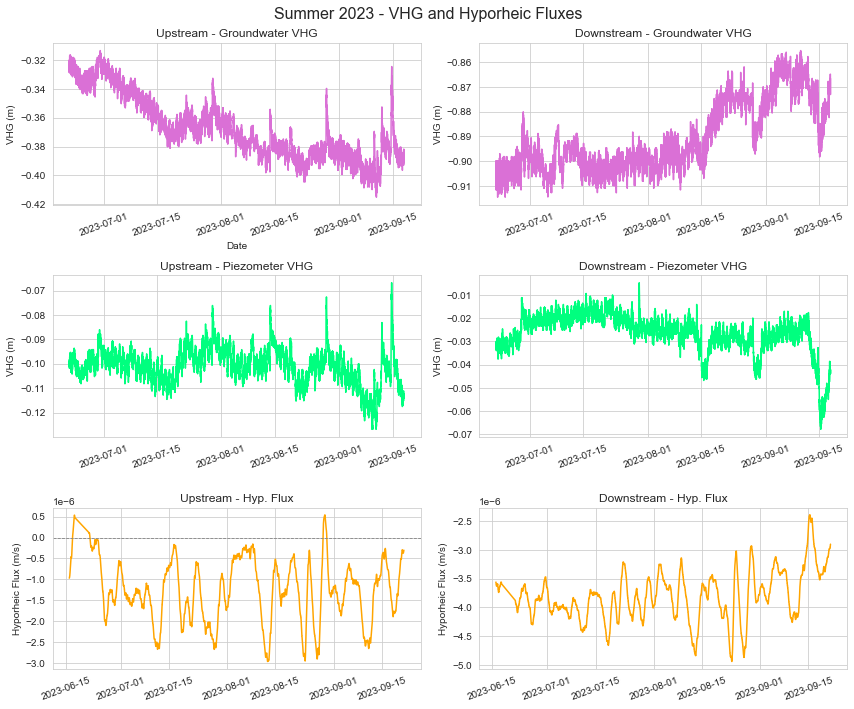

In [12]:
# set white background
sns.set_style("whitegrid")
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# UPSTREAM (LEFT)
# Plotting VHG-GW upstream
axs[0,0].plot(VHG_GW_summer.index, VHG_GW_summer["VHG_GW_upstream"], color="orchid", label="GW 8")
#axs[0,0].axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
axs[0,0].set_xlabel("Date")
axs[0,0].set_ylabel("VHG (m)")
axs[0,0].set_title("Upstream - Groundwater VHG")
# Plotting VHG-PZ upstream
axs[1,0].plot(VHG_PZ_summer.index, VHG_PZ_summer["upstream_bottom"], color="springgreen", label="Bottom Piezometer nest 5")
#axs[1,0].axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
axs[1,0].set_ylabel("VHG (m)")
axs[1,0].set_title("Upstream - Piezometer VHG")
# Plotting HYP-flux upstream
axs[2,0].plot(HYP_flux_summer.index, HYP_flux_summer["upstream"], color="orange", label="Probe 7")
axs[2,0].axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
axs[2,0].set_ylabel("Hyporheic Flux (m/s)")
axs[2,0].set_title("Upstream - Hyp. Flux")

# DOWNSTREAM (RIGHT)
# Plotting VHG-GW downstream
axs[0,1].plot(VHG_GW_summer.index, VHG_GW_summer["VHG_GW_downstream"], color="orchid", label="GW 3")
#axs[0,1].axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
axs[0,1].set_ylabel("VHG (m)")
axs[0,1].set_title("Downstream - Groundwater VHG")
# Plotting VHG-PZ downstream
axs[1,1].plot(VHG_PZ_summer.index, VHG_PZ_summer["downstream_bottom"], color="springgreen", label="Bottom Piezometer nest 2")
#axs[1,1].axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
axs[1,1].set_ylabel("VHG (m)")
axs[1,1].set_title("Downstream - Piezometer VHG")
# Plotting HYP-flux downstream
axs[2,1].plot(HYP_flux_summer.index, HYP_flux_summer["downstream"], color="orange", label="Probe 2")
#axs[2,1].axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
axs[2,1].set_ylabel("Hyporheic Flux (m/s)")
axs[2,1].set_title("Downstream - Hyp. Flux")
plt.grid(True)
# rotate x-axis labels
plt.setp(axs[0, 0].xaxis.get_majorticklabels(), rotation=20)
plt.setp(axs[0, 1].xaxis.get_majorticklabels(), rotation=20)
plt.setp(axs[1, 0].xaxis.get_majorticklabels(), rotation=20)
plt.setp(axs[1, 1].xaxis.get_majorticklabels(), rotation=20)
plt.setp(axs[2, 0].xaxis.get_majorticklabels(), rotation=20)
plt.setp(axs[2, 1].xaxis.get_majorticklabels(), rotation=20)

fig.suptitle("Summer 2023 - VHG and Hyporheic Fluxes", fontsize=16)
plt.tight_layout()  
plt.show()

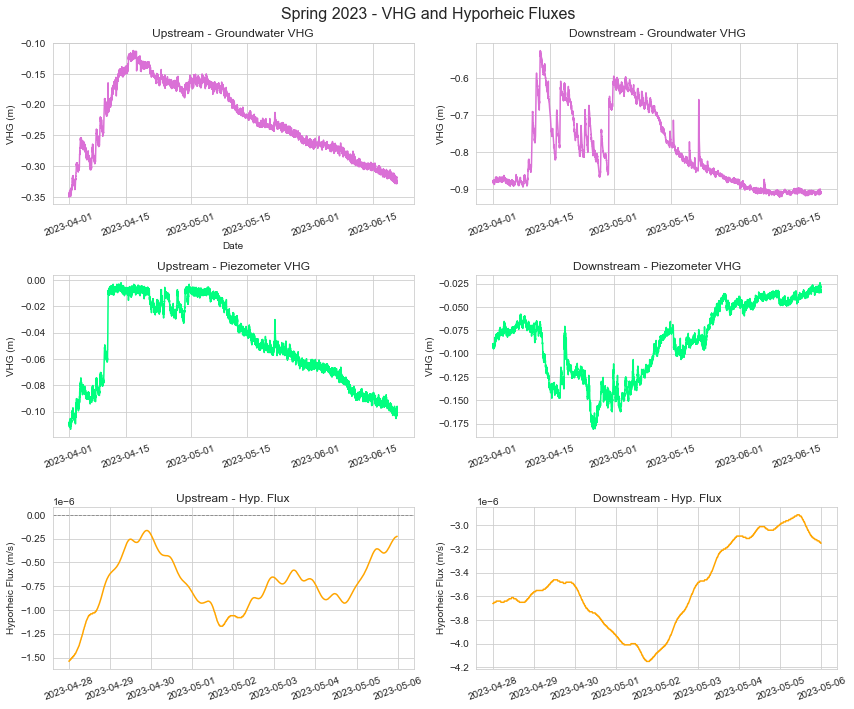

In [13]:
# set white background
sns.set_style("whitegrid")
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# UPSTREAM (LEFT)
# Plotting VHG-GW upstream
axs[0,0].plot(VHG_GW_spring.index, VHG_GW_spring["VHG_GW_upstream"], color="orchid", label="GW 8")
#axs[0,0].axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
axs[0,0].set_xlabel("Date")
axs[0,0].set_ylabel("VHG (m)")
axs[0,0].set_title("Upstream - Groundwater VHG")
# Plotting VHG-PZ upstream
axs[1,0].plot(VHG_PZ_spring.index, VHG_PZ_spring["upstream_bottom"], color="springgreen", label="Bottom Piezometer nest 5")
#axs[1,0].axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
axs[1,0].set_ylabel("VHG (m)")
axs[1,0].set_title("Upstream - Piezometer VHG")
# Plotting HYP-flux upstream
axs[2,0].plot(HYP_flux_spring.index, HYP_flux_spring["upstream"], color="orange", label="Probe 7")
axs[2,0].axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
axs[2,0].set_ylabel("Hyporheic Flux (m/s)")
axs[2,0].set_title("Upstream - Hyp. Flux")

# DOWNSTREAM (RIGHT)
# Plotting VHG-GW downstream
axs[0,1].plot(VHG_GW_spring.index, VHG_GW_spring["VHG_GW_downstream"], color="orchid", label="GW 3")
#axs[0,1].axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
axs[0,1].set_ylabel("VHG (m)")
axs[0,1].set_title("Downstream - Groundwater VHG")
# Plotting VHG-PZ downstream
axs[1,1].plot(VHG_PZ_spring.index, VHG_PZ_spring["downstream_bottom"], color="springgreen", label="Bottom Piezometer nest 2")
#axs[1,1].axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
axs[1,1].set_ylabel("VHG (m)")
axs[1,1].set_title("Downstream - Piezometer VHG")
# Plotting HYP-flux downstream
axs[2,1].plot(HYP_flux_spring.index, HYP_flux_spring["downstream"], color="orange", label="Probe 2")
#axs[2,1].axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
axs[2,1].set_ylabel("Hyporheic Flux (m/s)")
axs[2,1].set_title("Downstream - Hyp. Flux")
plt.grid(True)
# rotate x-axis labels
plt.setp(axs[0, 0].xaxis.get_majorticklabels(), rotation=20)
plt.setp(axs[0, 1].xaxis.get_majorticklabels(), rotation=20)
plt.setp(axs[1, 0].xaxis.get_majorticklabels(), rotation=20)
plt.setp(axs[1, 1].xaxis.get_majorticklabels(), rotation=20)
plt.setp(axs[2, 0].xaxis.get_majorticklabels(), rotation=20)
plt.setp(axs[2, 1].xaxis.get_majorticklabels(), rotation=20)

fig.suptitle("Spring 2023 - VHG and Hyporheic Fluxes", fontsize=16)
plt.tight_layout()  
plt.show()